In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [38]:
LEASE = 3000
get_timestamp = lambda time_str: datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S').timestamp()

# Completed Chameleon Lease

In [39]:
completed_lease = pd.read_csv('baselines/leases.csv')
start_time = completed_lease[completed_lease['completed']==0]['Time'].iloc[0]
end_time = completed_lease[completed_lease['completed']==LEASE]['Time'].iloc[0]
start_time, end_time

('2021-07-29 14:36:00', '2021-07-29 14:52:00')

# OSG Job Execution Cost

In [40]:
base_osg_jobs = pd.read_csv('baselines/osg_jobs.csv')
base_osg_jobs = base_osg_jobs.dropna()
base_osg_jobs = base_osg_jobs[base_osg_jobs['action'] == 'stop']
base_osg_jobs = base_osg_jobs[base_osg_jobs['JobSimCompleteDate'] < get_timestamp(end_time)]
del base_osg_jobs['_id']
base_osg_jobs = base_osg_jobs[(base_osg_jobs['TotalCost'] > 0) & (base_osg_jobs['WastedCost'] >= 0)]

In [47]:
base_osg_jobs.shape

(45967, 27)

In [41]:
base_osg_jobs['ResubmitCount'].value_counts()

0    41533
1     3897
2      489
3       40
4        7
5        1
Name: ResubmitCount, dtype: int64

In [42]:
base_osg_jobs[['TotalCost', 'WastedCost']].describe()

,TotalCost,WastedCost
count,45967.000000,45967.000000
mean,8.457332,0.419914
std,3.610235,2.257369
min,0.003673,0.000000
25%,6.462696,0.000000
50%,7.973079,0.000000
75%,9.923210,0.000000
max,137.152839,126.883161


# Resource Utilization

In [43]:
ru = pd.read_csv('baselines/utilization_rate.csv')
ru['Time'] = pd.to_datetime(ru['Time'])
ru = ru[ru['Time'] <= end_time]
ru = ru[ru['Chameleon Utl Rate'] != 0]
ru.set_index(['Time'], inplace=True)

<AxesSubplot:xlabel='Time'>

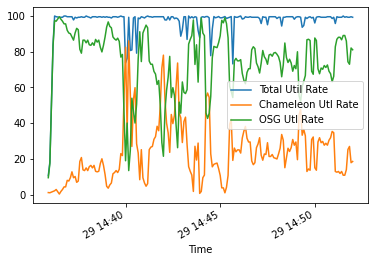

In [44]:
ru.plot()

In [45]:
ru.describe()

,Total Util Rate,Chameleon Utl Rate,OSG Utl Rate
count,192.000000,192.000000,192.000000
mean,97.128646,23.687281,74.180833
std,9.674951,16.144056,17.879292
min,10.700000,0.365000,9.520000
25%,98.900000,12.950000,67.225000
50%,99.300000,21.400000,77.200000
75%,99.600000,30.900000,86.725000
max,100.000000,86.100000,99.600000
